In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bmw.csv')

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


<Axes: >

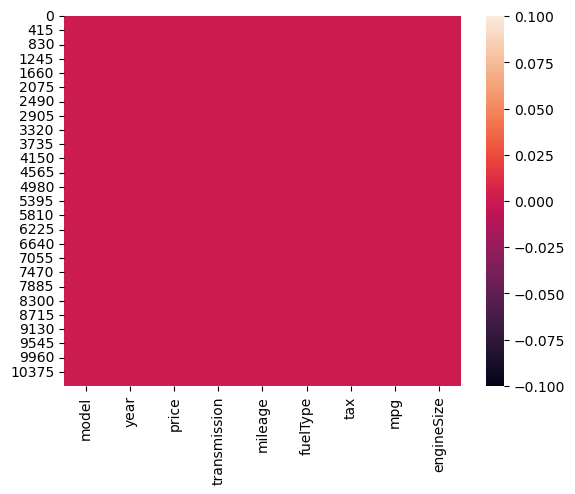

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [7]:
numerical_df = df.select_dtypes(include=['number'])

<Axes: >

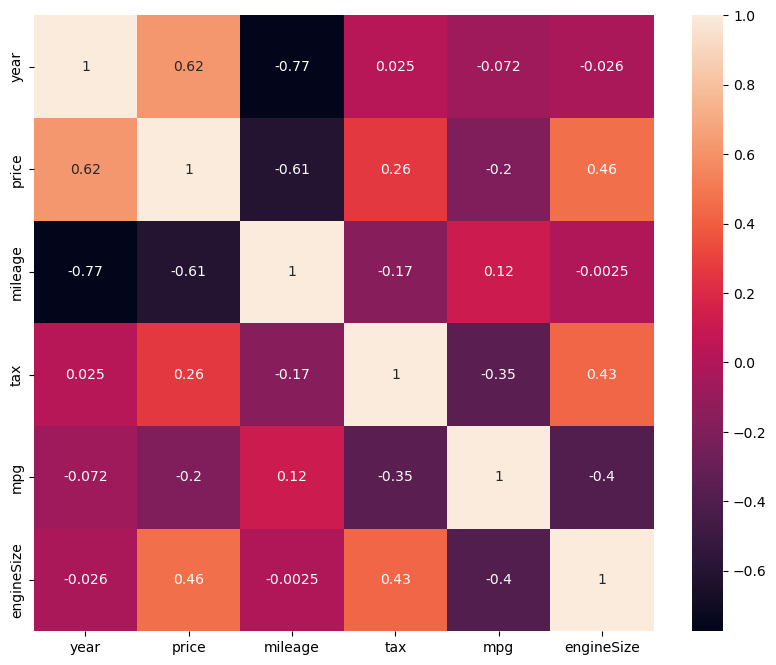

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True)

In [9]:
models = df.groupby('model')['tax'].count().sort_values(ascending=True).reset_index()
models = models.rename(columns={'tax':'numberOfCars'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, ' Z3'),
  Text(1, 0, ' M6'),
  Text(2, 0, ' i8'),
  Text(3, 0, ' M2'),
  Text(4, 0, ' M3'),
  Text(5, 0, ' M5'),
  Text(6, 0, ' 8 Series'),
  Text(7, 0, ' i3'),
  Text(8, 0, ' X7'),
  Text(9, 0, ' 7 Series'),
  Text(10, 0, ' X6'),
  Text(11, 0, ' Z4'),
  Text(12, 0, ' 6 Series'),
  Text(13, 0, ' M4'),
  Text(14, 0, ' X4'),
  Text(15, 0, ' X2'),
  Text(16, 0, ' X5'),
  Text(17, 0, ' X3'),
  Text(18, 0, ' X1'),
  Text(19, 0, ' 4 Series'),
  Text(20, 0, ' 5 Series'),
  Text(21, 0, ' 2 Series'),
  Text(22, 0, ' 1 Series'),
  Text(23, 0, ' 3 Series')])

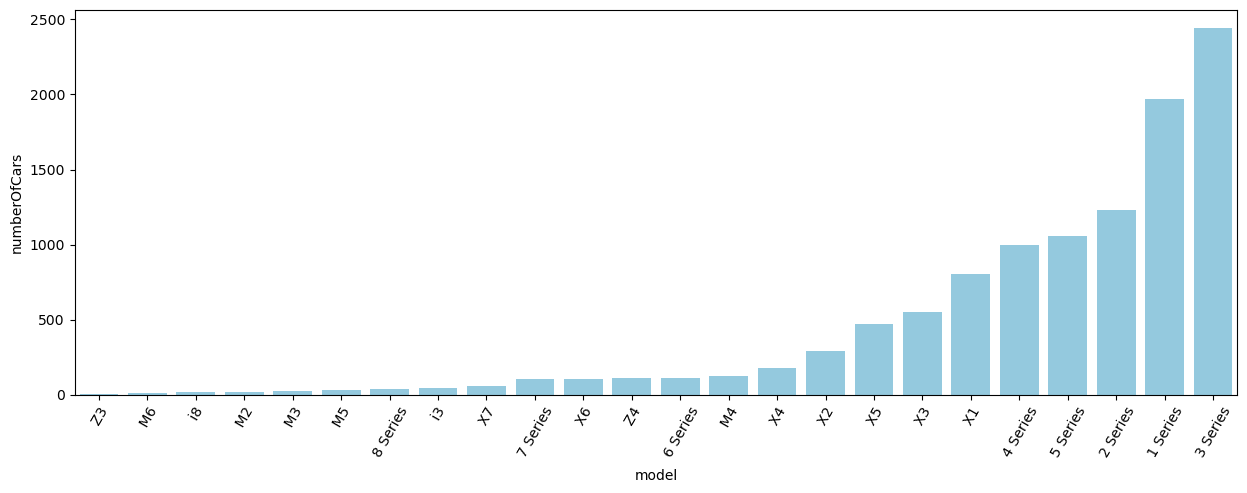

In [10]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], color='skyblue')
plt.xticks(rotation=60)

In [11]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

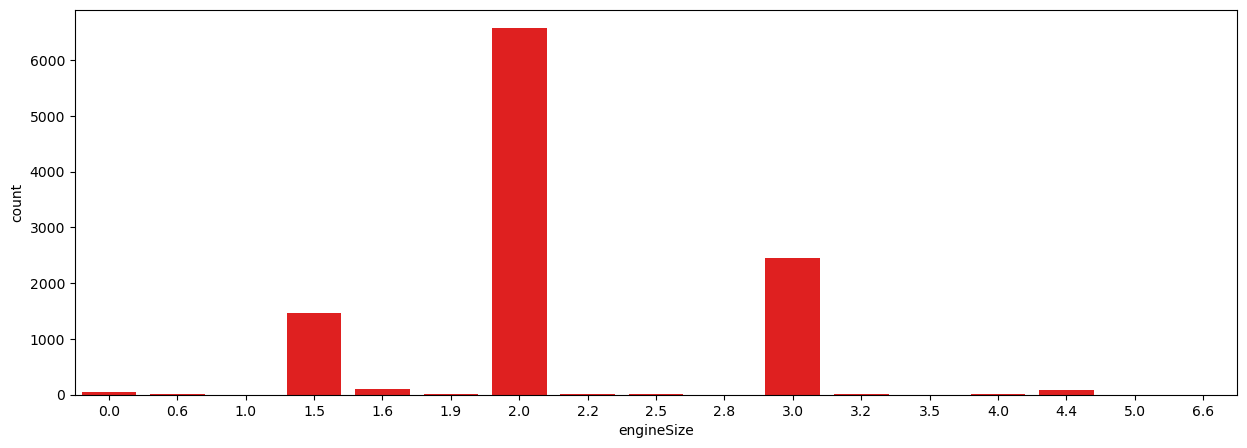

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='red')

C:\Users\Asus\AppData\Local\Temp\ipykernel_8592\148899218.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

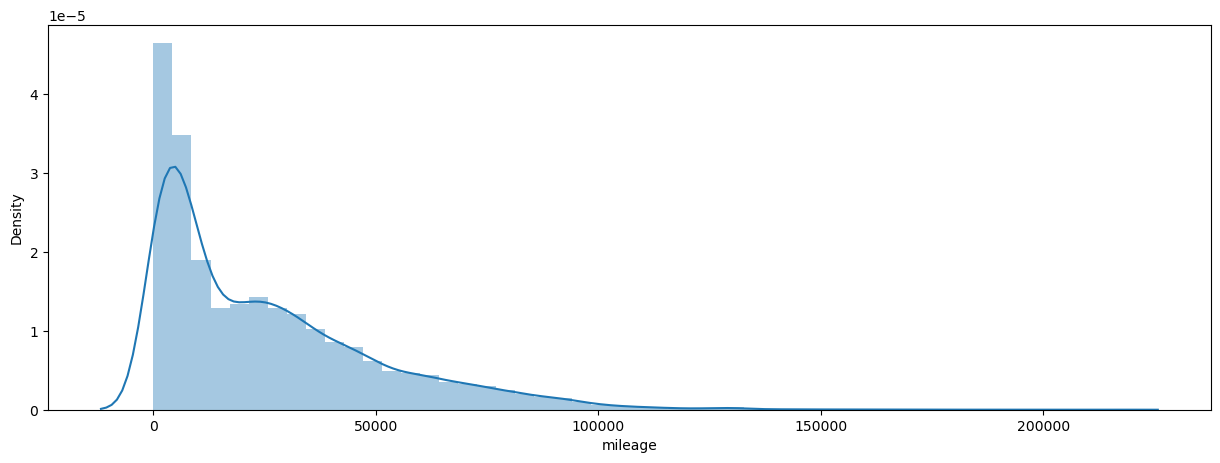

In [13]:
plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

**DISTRIBUSI HARGA MOBIL**

C:\Users\Asus\AppData\Local\Temp\ipykernel_8592\3048279456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

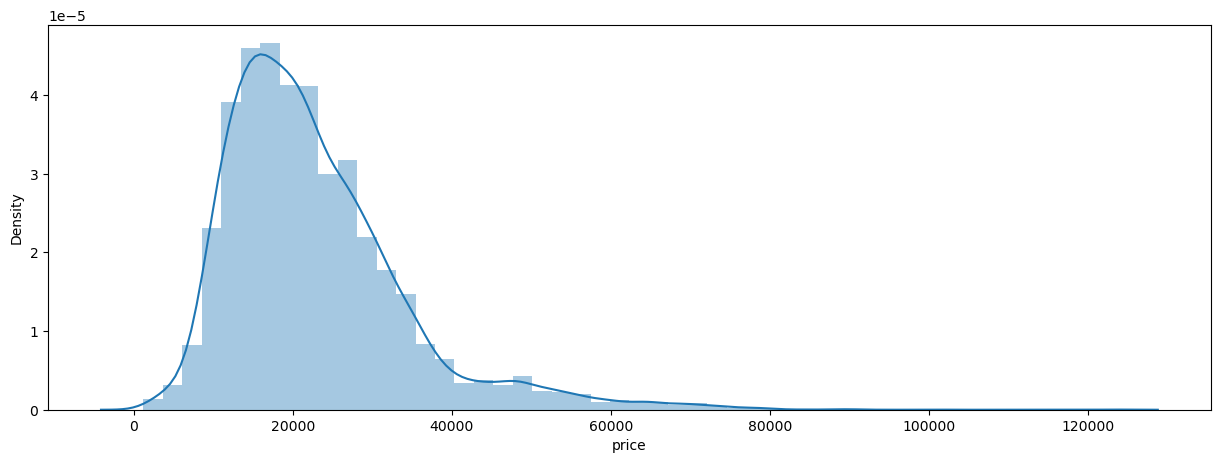

In [14]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

**SELEKSI FITUR**

In [15]:
features = ['year' , 'mileage' , 'tax' , 'mpg' , 'engineSize']
X = df[features]
y = df['price']
X.shape, y.shape

((10781, 5), (10781,))

**SPLIT DATA TRAINING DAN DATA TESTING**

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=70)
y_test.shape

(2696,)

**MODEL REGRESI LINEAR**

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [18]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linear = ', score)

akurasi model regresi linear =  0.6560888451480966


**INPUT MODEL REGRESI LINEAR**

In [19]:
input_data = np.array([[2019,5000,145,30.2,2 ]])

prediction = lr.predict(input_data)
print('Estimasi Harga Mobil dalam EUR :', prediction)

Estimasi Harga Mobil dalam EUR : [26969.70126876]


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**SAVE MODEL**

In [20]:
import pickle

filename = 'estimasi_mobil.sav'
pickle.dump(lr,open(filename,'wb'))